In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos del TP2
En esta carpeta de Jupyer vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.
1. **instancias-tsplib**: Instancias del TSP con sus soluciones óptimas encontradas en http://elib.zib.de/.

# Métodos
Los métodos evaluados en este notebook son los siguientes:
- **AGM**: Heurística árbol generador mínimo.
- **VEC**: Heurística vecindad.
- **INS**: Heurística inserción.

# Experimentos
Leemos el dataframe con todos los resultados.

In [3]:
df_resultados = pd.read_csv("resultados/resultado.csv");
df_resultados_malos = pd.read_csv("resultados/resultados_malos.csv");
df_resultados_complejidades = pd.read_csv("resultados/resultado_complejidades.csv");
df_resultados = pd.concat([df_resultados, df_resultados_complejidades])
#hay que agregar una columna 'porcentaje' para mergear con la experimentacion de tabu
#tambien podemos no mergearla ya que puede romper con los otros datos ya que su dataset no se diferencia
df_resultados_tabu_parametros = pd.read_csv("resultados/resultado_tabu_parametros.csv");
df_resultados_tabu_parametros2 = pd.read_csv("resultados/resultado_tabu_parametros2.csv");
df_resultados_tabu_parametros3 = pd.read_csv("resultados/resultado_tabu_parametros3.csv");
df_resultados_tabu_complejidad = pd.read_csv("resultados/resultado_tabu_complejidades.csv");


## Experimento 1: Complejidad de AGM
En este experimento evaluamos el método AGM con los datasets provistos, los datsets tsplib, aleatorio y (falta) de peor caso. La hipótesis es que es O(n²).

Índice de correlación de Pearson: 0.9866423237194426


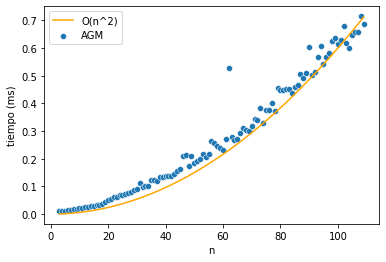

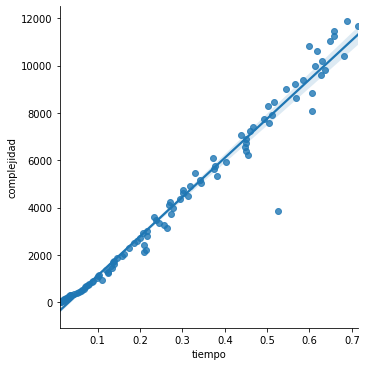

In [4]:
df_complejidad_AGM = df_resultados[(df_resultados["metodo"]=="AGM") & (df_resultados["dataset"]=="aleatorias-complejidad")].copy();
k = 0.00006
df_complejidad_AGM["tiempo_esperado"] = (df_complejidad_AGM["n"]**2) * k; 
fig = sns.scatterplot(data=df_complejidad_AGM, x='n', y='tiempo');
fig = sns.lineplot(data=df_complejidad_AGM, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(n^2)','AGM']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/AGM-complejidad.svg")

df_complejidad_AGM = df_resultados[(df_resultados["metodo"]=="AGM") & (df_resultados["dataset"]=="aleatorias-complejidad")].copy();
df_complejidad_AGM["complejidad"] = (df_complejidad_AGM["n"]**2);
fig = sns.lmplot(data=df_complejidad_AGM, x="tiempo", y="complejidad");
plt.savefig("graficos/AGM-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_AGM, "tiempo", "complejidad"));

## Experimento 1: Complejidad de INS
En este experimento evaluamos el método INS con los datasets provistos, los datsets tsplib, aleatorio y (falta) de peor caso. La hipótesis es que es O(n³).

Índice de correlación de Pearson: 0.9921960011598984


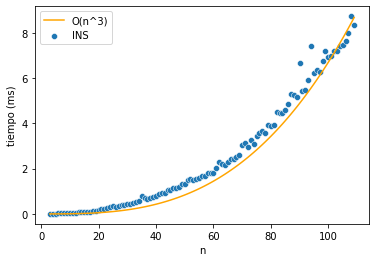

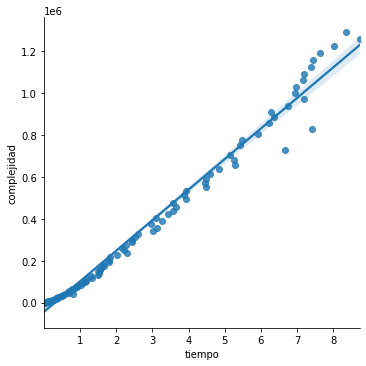

In [5]:
df_complejidad_INS = df_resultados[(df_resultados["metodo"]=="INS") & (df_resultados["dataset"]=="aleatorias-complejidad")].copy();
k = 0.0000067
df_complejidad_INS["tiempo_esperado"] = (df_complejidad_INS["n"]**3) * k; 
fig = sns.scatterplot(data=df_complejidad_INS, x='n', y='tiempo');
fig = sns.lineplot(data=df_complejidad_INS, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(n^3)','INS']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/INS-complejidad.svg")

df_complejidad_INS = df_resultados[(df_resultados["metodo"]=="INS") & (df_resultados["dataset"]=="aleatorias-complejidad")].copy();
df_complejidad_INS["complejidad"] = (df_complejidad_INS["n"]**3);
fig = sns.lmplot(data=df_complejidad_INS, x="tiempo", y="complejidad");
plt.savefig("graficos/INS-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_INS, "tiempo", "complejidad"));

## Experimento 1: Complejidad de VEC
En este experimento evaluamos el método VEC con los datasets provistos, los datsets tsplib, aleatorio y (falta) de peor caso. La hipótesis es que es O(n²).

Índice de correlación de Pearson: 0.9792553829391005


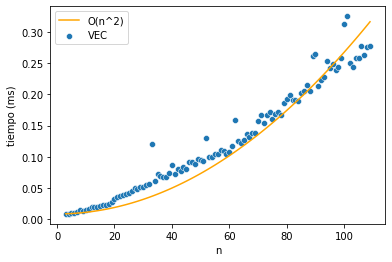

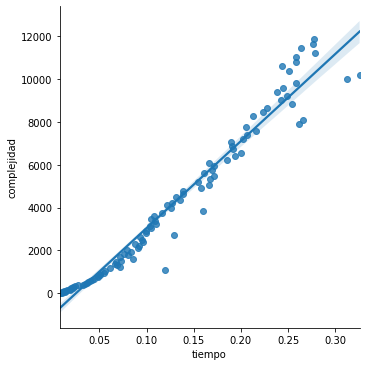

In [6]:
df_complejidad_VEC = df_resultados[(df_resultados["metodo"]=="VEC") & (df_resultados["dataset"]=="aleatorias-complejidad")].copy();
k = 0.000026
sum = 0.008
df_complejidad_VEC["tiempo_esperado"] = (df_complejidad_VEC["n"]**2) * k + sum; 
fig = sns.scatterplot(data=df_complejidad_VEC, x='n', y='tiempo');
fig = sns.lineplot(data=df_complejidad_VEC, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(n^2)','VEC']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/VEC-complejidad.svg")

df_complejidad_VEC = df_resultados[(df_resultados["metodo"]=="VEC") & (df_resultados["dataset"]=="aleatorias-complejidad")].copy();
df_complejidad_VEC["complejidad"] = (df_complejidad_VEC["n"]**2);
fig = sns.lmplot(data=df_complejidad_VEC, x="tiempo", y="complejidad");
plt.savefig("graficos/VEC-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_VEC, "tiempo", "complejidad"));

## Experimento 1: Complejidad de TABU con memoria de aristas
En este experimento evaluamos el método TABU con los datasets provistos, los datsets tsplib y aleatorios. La hipótesis es que es O(cantIters * log(n) * n³).

Índice de correlación de Pearson: 0.9972031024396526


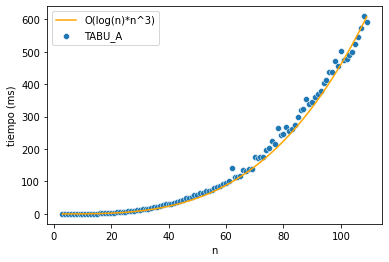

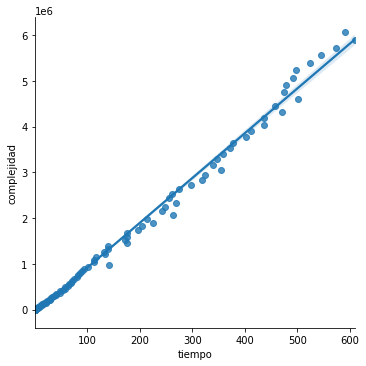

In [4]:
df_complejidad_TABU_A = df_resultados[(df_resultados["metodo"]=="TABU_A") & (df_resultados["dataset"]=="aleatorias-complejidad")].copy();
k = 0.0001
df_complejidad_TABU_A["tiempo_esperado"] = (np.log(df_complejidad_TABU_A["n"])) * (df_complejidad_TABU_A["n"]**3) * k; 
fig = sns.scatterplot(data=df_complejidad_TABU_A, x='n', y='tiempo');
fig = sns.lineplot(data=df_complejidad_TABU_A, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(log(n)*n^3)','TABU_A']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/TABU_A-n-complejidad.svg")

df_complejidad_TABU_A = df_resultados[(df_resultados["metodo"]=="TABU_A") & (df_resultados["dataset"]=="aleatorias-complejidad")].copy();
df_complejidad_TABU_A["complejidad"] = (np.log(df_complejidad_TABU_A["n"])) * (df_complejidad_TABU_A["n"]**3);
fig = sns.lmplot(data=df_complejidad_TABU_A, x="tiempo", y="complejidad");
plt.savefig("graficos/TABU_A-n-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_TABU_A, "tiempo", "complejidad"));

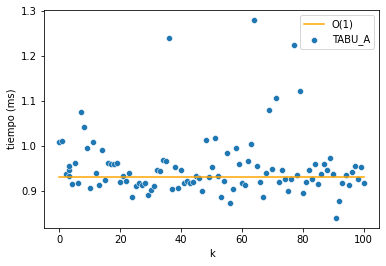

In [8]:
df_complejidad_TABU_A = df_resultados_tabu_complejidad[(df_resultados_tabu_complejidad["metodo"]=="TABU_A") & (df_resultados_tabu_complejidad['porcentaje'] == 0.3) & (df_resultados_tabu_complejidad['iteraciones'] == 5)].copy();
k = 0.39
df_complejidad_TABU_A["tiempo_esperado"] = 0.93; 
fig = sns.scatterplot(data=df_complejidad_TABU_A, x='k', y='tiempo');
fig = sns.lineplot(data=df_complejidad_TABU_A, x='k', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(1)','TABU_A']);
fig.set(xlabel='k', ylabel='tiempo (ms)');
plt.savefig("graficos/TABU_A-k-complejidad.svg")

#df_complejidad_TABU_A = df_resultados_tabu_complejidad[(df_resultados_tabu_complejidad["metodo"]=="TABU_A") & (df_resultados_tabu_complejidad['porcentaje'] == 0.3) & (df_resultados_tabu_complejidad['iteraciones'] == 5)].copy();
#df_complejidad_TABU_A["complejidad"] = ;
#fig = sns.lmplot(data=df_complejidad_TABU_A, x="tiempo", y="complejidad");
#plt.savefig("graficos/TABU_A-k-correlacion.svg");
#print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_TABU_A, "tiempo", "complejidad"));

Índice de correlación de Pearson: 0.9920450080776765


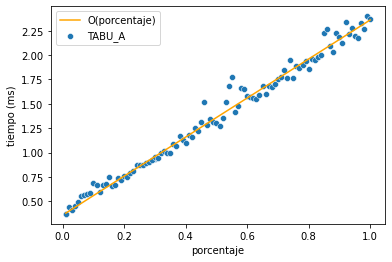

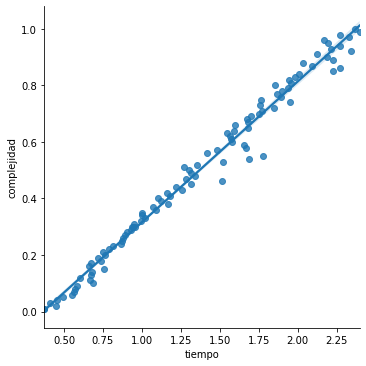

In [9]:
df_complejidad_TABU_A = df_resultados_tabu_complejidad[(df_resultados_tabu_complejidad["metodo"]=="TABU_A") & (df_resultados_tabu_complejidad['k'] == 3) & (df_resultados_tabu_complejidad['iteraciones'] == 5)].copy();
k = 2
df_complejidad_TABU_A["tiempo_esperado"] = df_complejidad_TABU_A['porcentaje'] * k + 0.36; 
fig = sns.scatterplot(data=df_complejidad_TABU_A, x='porcentaje', y='tiempo');
fig = sns.lineplot(data=df_complejidad_TABU_A, x='porcentaje', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(porcentaje)','TABU_A']);
fig.set(xlabel='porcentaje', ylabel='tiempo (ms)');
plt.savefig("graficos/TABU_A-%-complejidad.svg")

df_complejidad_TABU_A = df_resultados_tabu_complejidad[(df_resultados_tabu_complejidad["metodo"]=="TABU_A") & (df_resultados_tabu_complejidad['k'] == 3) & (df_resultados_tabu_complejidad['iteraciones'] == 5)].copy();
df_complejidad_TABU_A["complejidad"] = df_complejidad_TABU_A['porcentaje'];
fig = sns.lmplot(data=df_complejidad_TABU_A, x="tiempo", y="complejidad");
plt.savefig("graficos/TABU_A-%-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_TABU_A, "tiempo", "complejidad"));

Índice de correlación de Pearson: 0.9970084596652568


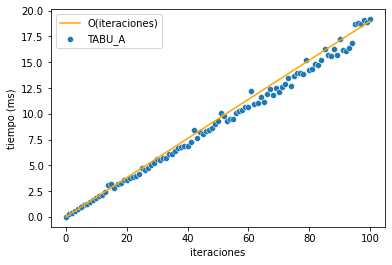

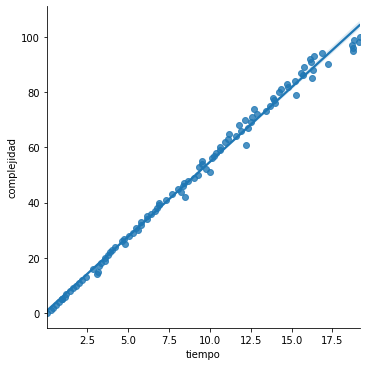

In [10]:
df_complejidad_TABU_A = df_resultados_tabu_complejidad[(df_resultados_tabu_complejidad["metodo"]=="TABU_A") & (df_resultados_tabu_complejidad['k'] == 3) & (df_resultados_tabu_complejidad['porcentaje'] == 0.3)].copy();
k = 0.19
df_complejidad_TABU_A["tiempo_esperado"] = df_complejidad_TABU_A['iteraciones'] * k; 
fig = sns.scatterplot(data=df_complejidad_TABU_A, x='iteraciones', y='tiempo');
fig = sns.lineplot(data=df_complejidad_TABU_A, x='iteraciones', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(iteraciones)','TABU_A']);
fig.set(xlabel='iteraciones', ylabel='tiempo (ms)');
plt.savefig("graficos/TABU_A-iter-complejidad.svg")

df_complejidad_TABU_A = df_resultados_tabu_complejidad[(df_resultados_tabu_complejidad["metodo"]=="TABU_A") & (df_resultados_tabu_complejidad['k'] == 3) & (df_resultados_tabu_complejidad['porcentaje'] == 0.3)].copy();
df_complejidad_TABU_A["complejidad"] = df_complejidad_TABU_A['iteraciones'];
fig = sns.lmplot(data=df_complejidad_TABU_A, x="tiempo", y="complejidad");
plt.savefig("graficos/TABU_A-iter-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_TABU_A, "tiempo", "complejidad"));

## Experimento 1: Complejidad de TABU con memoria de soluciones previas
En este experimento evaluamos el método TABU con los datasets provistos, los datsets tsplib, aleatorio y (falta) de peor caso. La hipótesis es que es O(n²).

Índice de correlación de Pearson: 0.9961244719103661


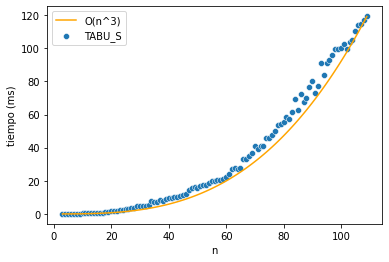

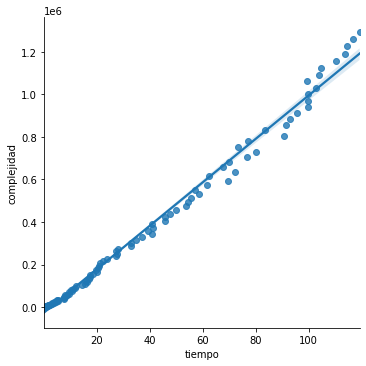

In [11]:
df_complejidad_TABU_S = df_resultados[(df_resultados["metodo"]=="TABU_S") & (df_resultados["dataset"]=="aleatorias-complejidad")].copy();
k = 0.000092
df_complejidad_TABU_S["tiempo_esperado"] = (df_complejidad_TABU_S["n"]**3) * k; 
fig = sns.scatterplot(data=df_complejidad_TABU_S, x='n', y='tiempo');
fig = sns.lineplot(data=df_complejidad_TABU_S, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(n^3)','TABU_S']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/TABU_S-n-complejidad.svg")

df_complejidad_TABU_S = df_resultados[(df_resultados["metodo"]=="TABU_S") & (df_resultados["dataset"]=="aleatorias-complejidad")].copy();
df_complejidad_TABU_S["complejidad"] = (df_complejidad_TABU_S["n"]**3);
fig = sns.lmplot(data=df_complejidad_TABU_S, x="tiempo", y="complejidad");
plt.savefig("graficos/TABU_S-n-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_TABU_S, "tiempo", "complejidad"));

/home/blas/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


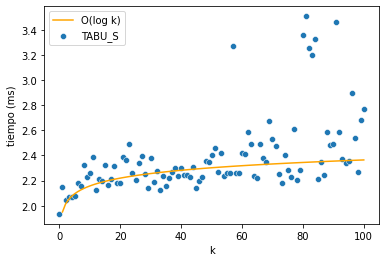

In [12]:
df_complejidad_TABU_A = df_resultados_tabu_complejidad[(df_resultados_tabu_complejidad["metodo"]=="TABU_S") & (df_resultados_tabu_complejidad['porcentaje'] == 1) & (df_resultados_tabu_complejidad['iteraciones'] == 15)].copy();
k = 0.09
df_complejidad_TABU_A["tiempo_esperado"] = np.log(df_complejidad_TABU_A['k']) * k + 1.95; 
fig = sns.scatterplot(data=df_complejidad_TABU_A, x='k', y='tiempo');
fig = sns.lineplot(data=df_complejidad_TABU_A, x='k', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(log k)','TABU_S']);
fig.set(xlabel='k', ylabel='tiempo (ms)');
plt.savefig("graficos/TABU_S-k-complejidad.svg")

#df_complejidad_TABU_A = df_resultados_tabu_complejidad[(df_resultados_tabu_complejidad["metodo"]=="TABU_S") & (df_resultados_tabu_complejidad['porcentaje'] == 1) & (df_resultados_tabu_complejidad['iteraciones'] == 15)].copy();
#df_complejidad_TABU_A["complejidad"] = np.log(df_complejidad_TABU_A['k']);
#fig = sns.lmplot(data=df_complejidad_TABU_A, x="tiempo", y="complejidad");
#plt.savefig("graficos/TABU_S-k-correlacion.svg");
#print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_TABU_A, "tiempo", "complejidad"));

Índice de correlación de Pearson: 0.9613292583317059


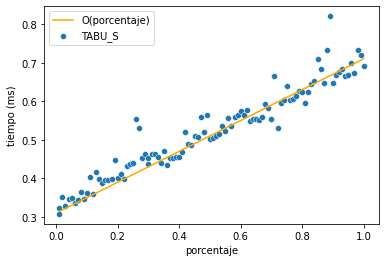

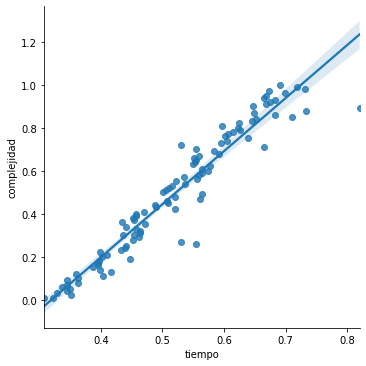

In [13]:
df_complejidad_TABU_A = df_resultados_tabu_complejidad[(df_resultados_tabu_complejidad["metodo"]=="TABU_S") & (df_resultados_tabu_complejidad['k'] == 3) & (df_resultados_tabu_complejidad['iteraciones'] == 5)].copy();
k = 0.4
df_complejidad_TABU_A["tiempo_esperado"] = df_complejidad_TABU_A['porcentaje'] * k + 0.31; 
fig = sns.scatterplot(data=df_complejidad_TABU_A, x='porcentaje', y='tiempo');
fig = sns.lineplot(data=df_complejidad_TABU_A, x='porcentaje', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(porcentaje)','TABU_S']);
fig.set(xlabel='porcentaje', ylabel='tiempo (ms)');
plt.savefig("graficos/TABU_S-%-complejidad.svg")

df_complejidad_TABU_A = df_resultados_tabu_complejidad[(df_resultados_tabu_complejidad["metodo"]=="TABU_S") & (df_resultados_tabu_complejidad['k'] == 3) & (df_resultados_tabu_complejidad['iteraciones'] == 5)].copy();
df_complejidad_TABU_A["complejidad"] = df_complejidad_TABU_A['porcentaje'];
fig = sns.lmplot(data=df_complejidad_TABU_A, x="tiempo", y="complejidad");
plt.savefig("graficos/TABU_S-%-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_TABU_A, "tiempo", "complejidad"));

Índice de correlación de Pearson: 0.9932323276634712


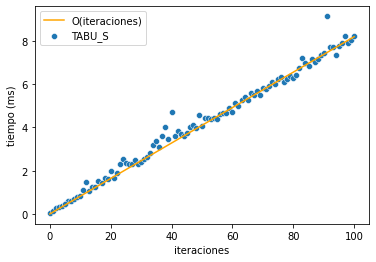

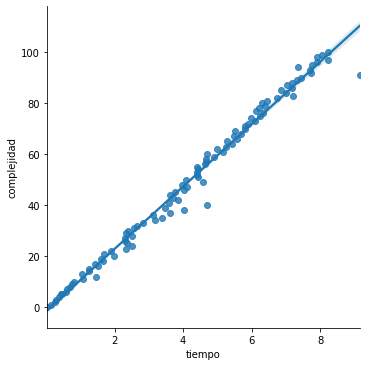

In [14]:
df_complejidad_TABU_A = df_resultados_tabu_complejidad[(df_resultados_tabu_complejidad["metodo"]=="TABU_S") & (df_resultados_tabu_complejidad['k'] == 3) & (df_resultados_tabu_complejidad['porcentaje'] == 0.3)].copy();
k = 0.082
df_complejidad_TABU_A["tiempo_esperado"] = df_complejidad_TABU_A['iteraciones']*k; 
fig = sns.scatterplot(data=df_complejidad_TABU_A, x='iteraciones', y='tiempo');
fig = sns.lineplot(data=df_complejidad_TABU_A, x='iteraciones', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(iteraciones)','TABU_S']);
fig.set(xlabel='iteraciones', ylabel='tiempo (ms)');
plt.savefig("graficos/TABU_S-iter-complejidad.svg")

df_complejidad_TABU_A = df_resultados_tabu_complejidad[(df_resultados_tabu_complejidad["metodo"]=="TABU_S") & (df_resultados_tabu_complejidad['k'] == 3) & (df_resultados_tabu_complejidad['porcentaje'] == 0.3)].copy();
df_complejidad_TABU_A["complejidad"] = df_complejidad_TABU_A['iteraciones'];
fig = sns.lmplot(data=df_complejidad_TABU_A, x="tiempo", y="complejidad");
plt.savefig("graficos/TABU_S-iter-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_TABU_A, "tiempo", "complejidad"));

# Experimento 3: Tiempo vs performance

In [15]:
df_complejidad_INS_tsplib = df_resultados[(df_resultados["metodo"]=="INS") & (df_resultados["dataset"]=="instancias-tsplib")].copy();
df_complejidad_VEC_tsplib = df_resultados[(df_resultados["metodo"]=="VEC") & (df_resultados["dataset"]=="instancias-tsplib")].copy();
df_complejidad_AGM_tsplib = df_resultados[(df_resultados["metodo"]=="AGM") & (df_resultados["dataset"]=="instancias-tsplib")].copy();
#para tabu habria que usar el dataset de los parametros (y elegir los parametros a usar?)
df_complejidad_TABU_S_tsplib = df_resultados_tabu_parametros[(df_resultados_tabu_parametros["metodo"]=="TABU_S") & (df_resultados_tabu_parametros["dataset"]=="instancias-tsplib") & (df_resultados_tabu_parametros["k"]==3) & (df_resultados_tabu_parametros["iteraciones"]==19) & (df_resultados_tabu_parametros["porcentaje"]==0.9)].copy();
df_complejidad_TABU_A_tsplib = df_resultados_tabu_parametros[(df_resultados_tabu_parametros["metodo"]=="TABU_A") & (df_resultados_tabu_parametros["dataset"]=="instancias-tsplib") & (df_resultados_tabu_parametros["k"]==3) & (df_resultados_tabu_parametros["iteraciones"]==19) & (df_resultados_tabu_parametros["porcentaje"]==0.9)].copy();
#df_complejidad_TABU_S_tsplib = df_resultados[(df_resultados["metodo"]=="TABU_S") & (df_resultados["dataset"]=="instancias-tsplib")].copy();
#df_complejidad_TABU_A_tsplib = df_resultados[(df_resultados["metodo"]=="TABU_A") & (df_resultados["dataset"]=="instancias-tsplib")].copy();
#aca los gaps son string por alguna razon
df_complejidad_INS_tsplib["gap_relativo"] = pd.to_numeric(df_complejidad_INS_tsplib["gap_relativo"], downcast="float")
df_complejidad_VEC_tsplib["gap_relativo"] = pd.to_numeric(df_complejidad_VEC_tsplib["gap_relativo"], downcast="float")
df_complejidad_AGM_tsplib["gap_relativo"] = pd.to_numeric(df_complejidad_AGM_tsplib["gap_relativo"], downcast="float")

En el siguiente gráfico mostraremos los puntos (tiempo,metrica) de cada instancia para comparar la efectividad de cada algoritmo con el dataset tsplib.

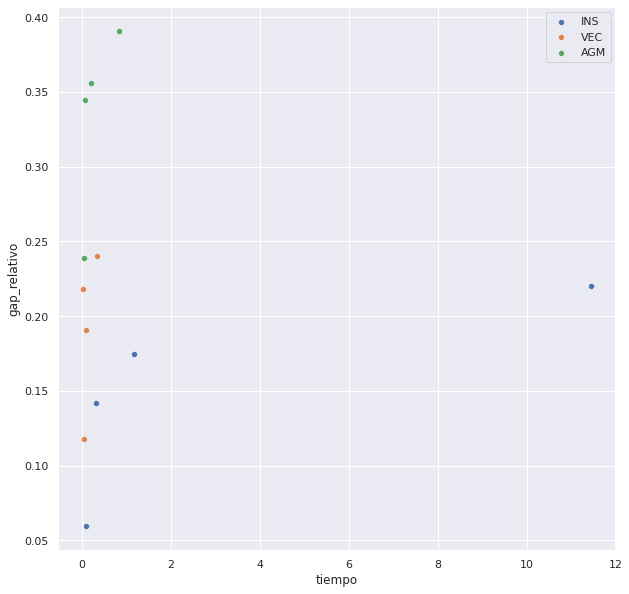

In [40]:
fig = sns.scatterplot(data=df_complejidad_INS_tsplib, x='tiempo', y='gap_relativo');
fig = sns.scatterplot(data=df_complejidad_VEC_tsplib, x='tiempo', y='gap_relativo');
fig = sns.scatterplot(data=df_complejidad_AGM_tsplib, x='tiempo', y='gap_relativo');

fig.legend(labels=['INS','VEC','AGM']);

plt.savefig("graficos/metodos-tiempo-vs-gap_relativo.svg");

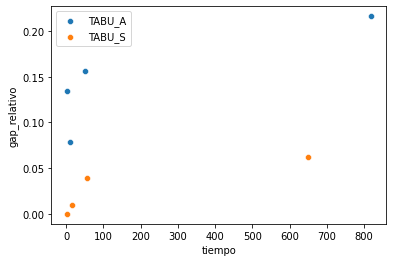

In [17]:
fig = sns.scatterplot(data=df_complejidad_TABU_A_tsplib, x='tiempo', y='gap_relativo');
fig = sns.scatterplot(data=df_complejidad_TABU_S_tsplib, x='tiempo', y='gap_relativo');
fig.legend(labels=['TABU_A','TABU_S']);

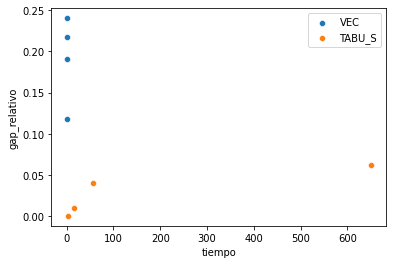

In [18]:
fig = sns.scatterplot(data=df_complejidad_VEC_tsplib, x='tiempo', y='gap_relativo');
fig = sns.scatterplot(data=df_complejidad_TABU_S_tsplib, x='tiempo', y='gap_relativo');

fig.legend(labels=['VEC','TABU_S']);

In [19]:
df_complejidad_INS_aleatorias = df_resultados[(df_resultados["metodo"]=="INS") & (df_resultados["dataset"]=="aleatorias")].copy();
df_complejidad_VEC_aleatorias = df_resultados[(df_resultados["metodo"]=="VEC") & (df_resultados["dataset"]=="aleatorias")].copy();
df_complejidad_AGM_aleatorias = df_resultados[(df_resultados["metodo"]=="AGM") & (df_resultados["dataset"]=="aleatorias")].copy();
#abria que correr tabu con los mejores parametros en estas instancias aleatorias? (aca k=3, iter=7 y porcentaje=1)
df_complejidad_TABU_A_aleatorias = df_resultados[(df_resultados["metodo"]=="TABU_A") & (df_resultados["dataset"]=="aleatorias")].copy();
df_complejidad_TABU_S_aleatorias = df_resultados[(df_resultados["metodo"]=="TABU_S") & (df_resultados["dataset"]=="aleatorias")].copy();

En el siguiente gráfico mostraremos los puntos (tiempo,obtenido) de cada instancia para comparar la efectividad de cada algoritmo con el dataset aleatorio.

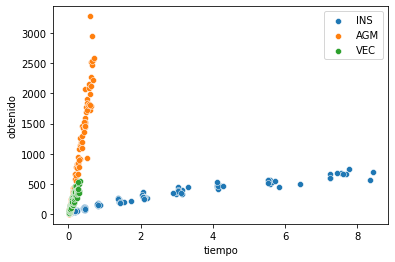

In [20]:
fig = sns.scatterplot(data=df_complejidad_INS_aleatorias, x='tiempo', y='obtenido');
fig = sns.scatterplot(data=df_complejidad_AGM, x='tiempo', y='obtenido');
fig = sns.scatterplot(data=df_complejidad_VEC_aleatorias, x='tiempo', y='obtenido');


fig.legend(labels=['INS','AGM','VEC']);

plt.savefig("graficos/metodos-tiempo-vs-obtenido.svg");

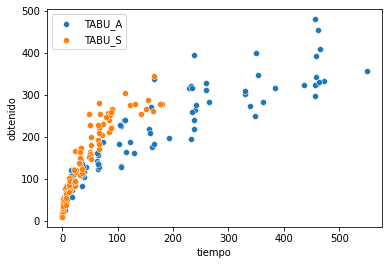

In [21]:
fig = sns.scatterplot(data=df_complejidad_TABU_A_aleatorias, x='tiempo', y='obtenido');
fig = sns.scatterplot(data=df_complejidad_TABU_S_aleatorias, x='tiempo', y='obtenido');
fig.legend(labels=['TABU_A','TABU_S']);

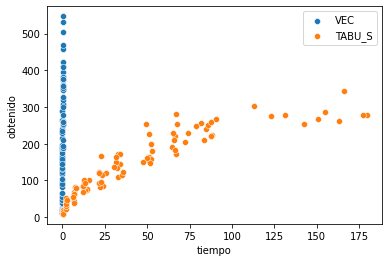

In [22]:
fig = sns.scatterplot(data=df_complejidad_VEC_aleatorias, x='tiempo', y='obtenido');
fig = sns.scatterplot(data=df_complejidad_TABU_S_aleatorias, x='tiempo', y='obtenido');
fig.legend(labels=['VEC','TABU_S']);

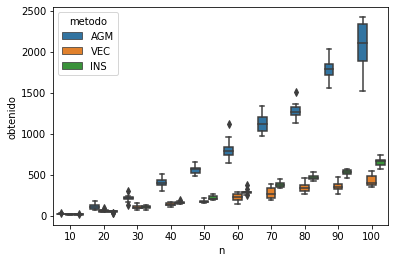

In [23]:
df_boxplot = df_resultados[(df_resultados["dataset"]=="aleatorias") & (df_resultados["metodo"]!="TABU_A") & (df_resultados["metodo"]!="TABU_S")]
boxpot = sns.boxplot(x=df_boxplot['n'],y=df_boxplot['obtenido'],hue=df_boxplot['metodo'])
sns.set(rc={'figure.figsize':(10,10)})
plt.savefig("graficos/heuristicas-boxplot.svg")

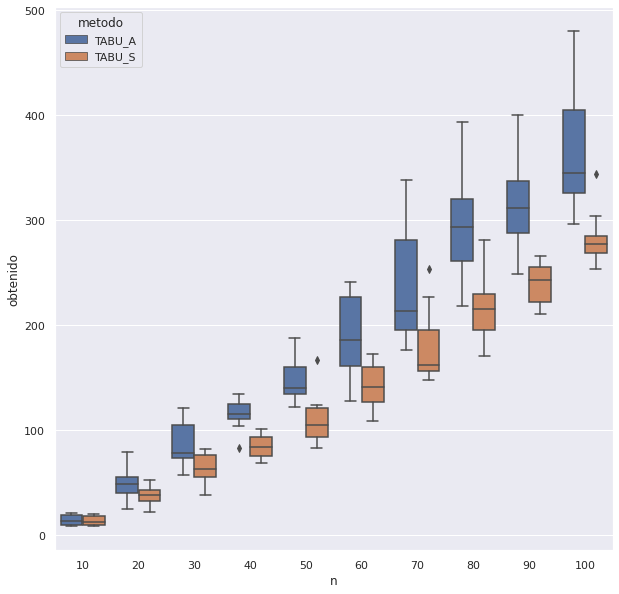

In [24]:
df_boxplot = df_resultados[(df_resultados["dataset"]=="aleatorias") & (df_resultados["metodo"]!="VEC") & (df_resultados["metodo"]!="INS") & (df_resultados["metodo"]!="AGM")]
boxpot = sns.boxplot(x=df_boxplot['n'],y=df_boxplot['obtenido'],hue=df_boxplot['metodo'])
sns.set(rc={'figure.figsize':(10,10)})
plt.savefig("graficos/tabu-boxplot.svg")

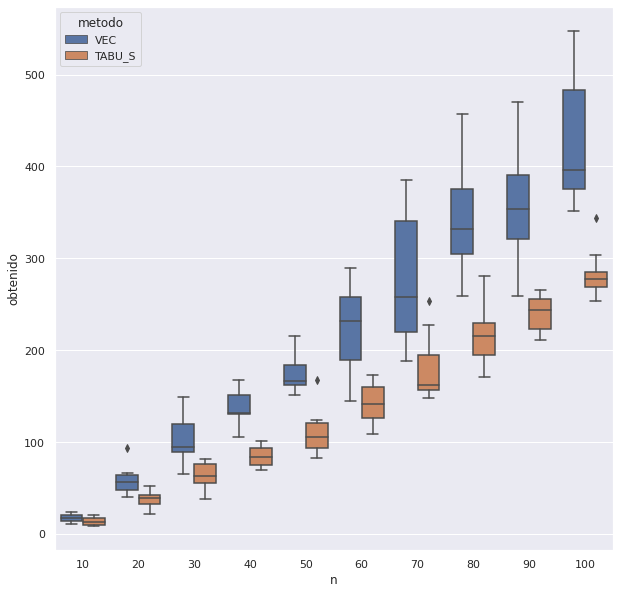

In [7]:
df_boxplot = df_resultados[(df_resultados["dataset"]=="aleatorias") & (df_resultados["metodo"]!="INS") & (df_resultados["metodo"]!="AGM")& (df_resultados["metodo"]!="TABU_A")]
boxpot = sns.boxplot(x=df_boxplot['n'],y=df_boxplot['obtenido'],hue=df_boxplot['metodo'])
sns.set(rc={'figure.figsize':(10,10)})
plt.savefig("graficos/tabu-vec-boxplot.svg")

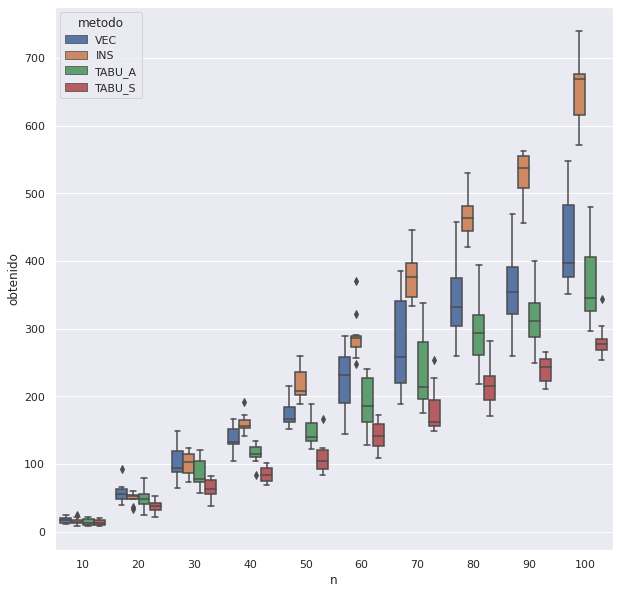

In [6]:
df_boxplot = df_resultados[(df_resultados["dataset"]=="aleatorias")& (df_resultados["metodo"]!="AGM")]
boxpot = sns.boxplot(x=df_boxplot['n'],y=df_boxplot['obtenido'],hue=df_boxplot['metodo'])
sns.set(rc={'figure.figsize':(10,10)})
plt.savefig("graficos/boxplot.svg")

# Experimento 3: Comparación de lo obtenido en los casos malos vs el óptimo

In [27]:
df_complejidad_AGM_malo = df_resultados_malos[(df_resultados_malos["metodo"]=="AGM") & (df_resultados_malos["dataset"]=="malo-agm-vec")].copy();
df_complejidad_VEC_malo = df_resultados_malos[(df_resultados_malos["metodo"]=="VEC") & (df_resultados_malos["dataset"]=="malo-agm-vec")].copy();

AGM

Índice de correlación de Pearson: 0.9999999999999999


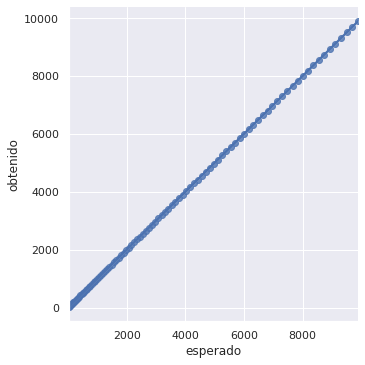

In [28]:
fig = sns.lmplot(data=df_complejidad_AGM_malo, x="esperado", y="obtenido");
plt.savefig("graficos/correlacion-agm-malo.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_AGM_malo, "esperado", "obtenido"));

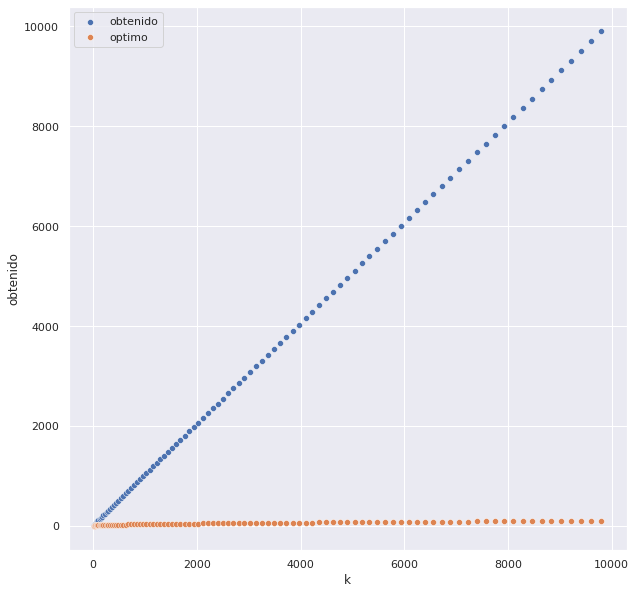

In [29]:
fig = sns.scatterplot(data=df_complejidad_AGM_malo, x='k', y='obtenido');
fig = sns.scatterplot(data=df_complejidad_AGM_malo, x='k', y='optimo');
fig.legend(labels=['obtenido','optimo']);

plt.savefig("graficos/obtenido-optimo-k-agm.svg");

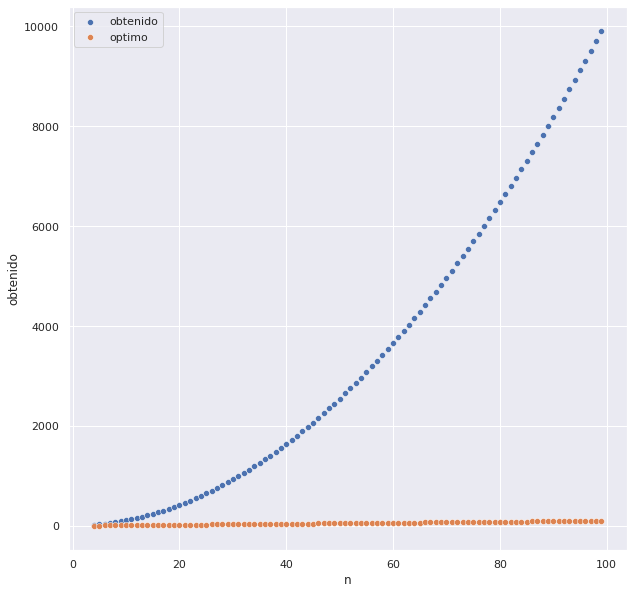

In [30]:
fig = sns.scatterplot(data=df_complejidad_AGM_malo, x='n', y='obtenido');
fig = sns.scatterplot(data=df_complejidad_AGM_malo, x='n', y='optimo');
fig.legend(labels=['obtenido','optimo']);

plt.savefig("graficos/obtenido-optimo-n-agm.svg");

Índice de correlación de Pearson: 0.9999999999999999


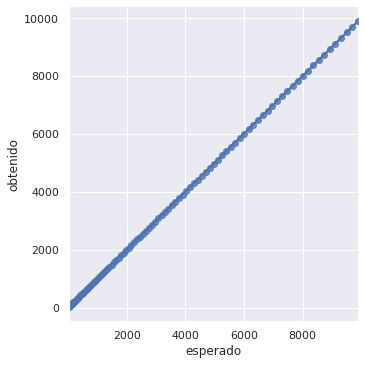

In [31]:
fig = sns.lmplot(data=df_complejidad_VEC_malo, x="esperado", y="obtenido");
plt.savefig("graficos/correlacion-vec-malo.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_VEC_malo, "esperado", "obtenido"));

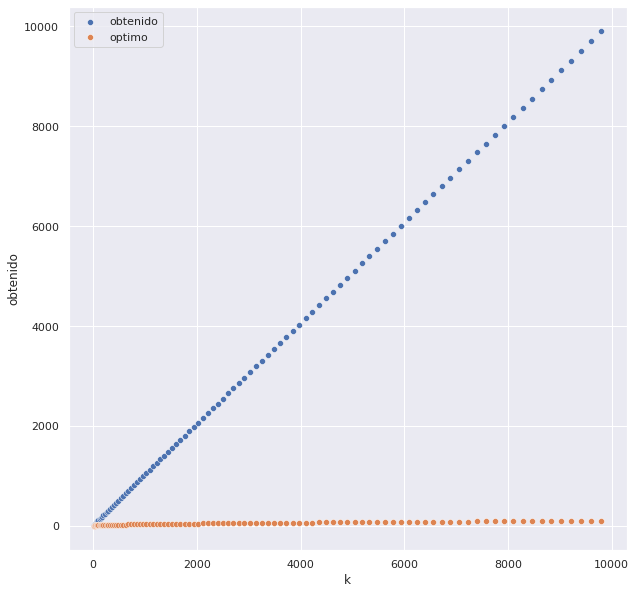

In [32]:
fig = sns.scatterplot(data=df_complejidad_VEC_malo, x='k', y='obtenido');
fig = sns.scatterplot(data=df_complejidad_VEC_malo, x='k', y='optimo');
fig.legend(labels=['obtenido','optimo']);

plt.savefig("graficos/obtenido-optimo-k-vec.svg");

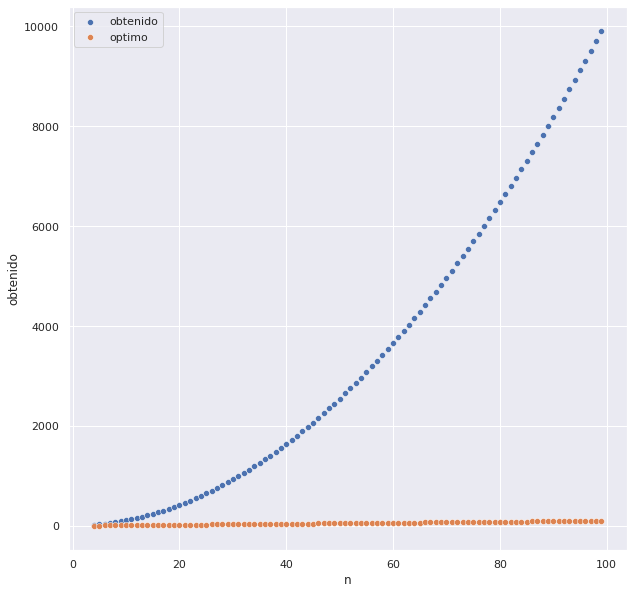

In [33]:
fig = sns.scatterplot(data=df_complejidad_VEC_malo, x='n', y='obtenido');
fig = sns.scatterplot(data=df_complejidad_VEC_malo, x='n', y='optimo');
fig.legend(labels=['obtenido','optimo']);

plt.savefig("graficos/obtenido-optimo-n-vec.svg");

# Experimento 4: Tabú search

# Busqueda mejores parametros tabu

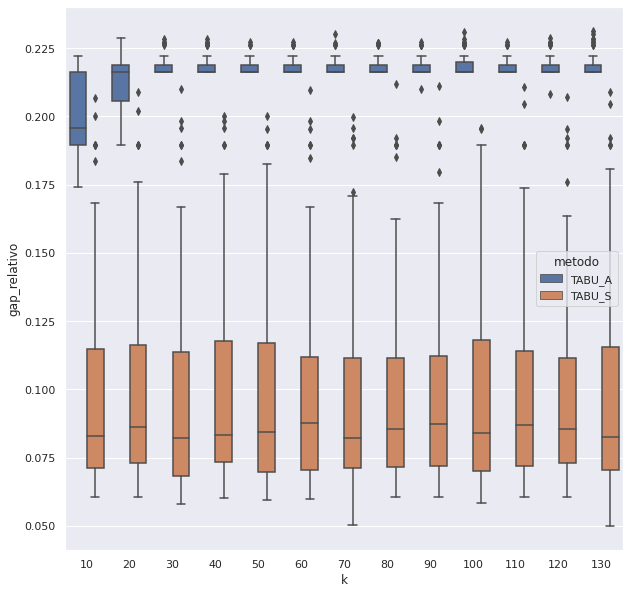

In [34]:
df_boxplot_tabu = df_resultados_tabu_parametros2[(df_resultados_tabu_parametros2['n'] == 130)].copy();
boxplot = sns.boxplot(x = df_boxplot_tabu['k'], y=df_boxplot_tabu['gap_relativo'], hue=df_boxplot_tabu['metodo'])
plt.savefig("graficos/mejores-parametros-tabu-k-n130-boxplot.svg")

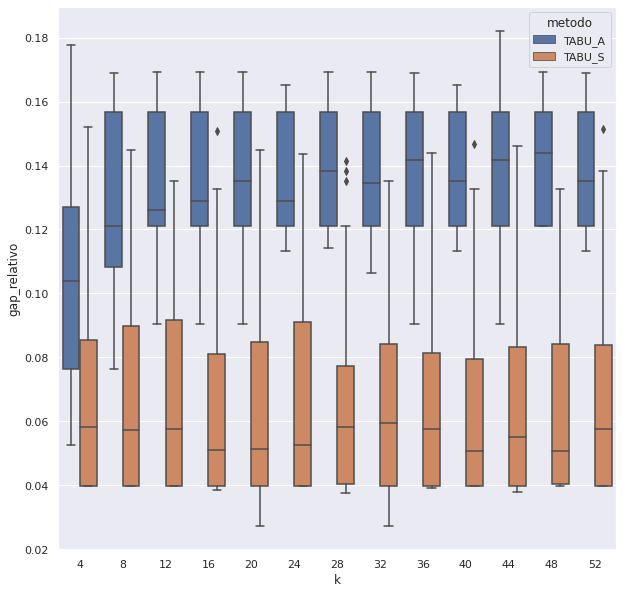

In [35]:
df_boxplot_tabu = df_resultados_tabu_parametros2[(df_resultados_tabu_parametros2['n'] == 52)].copy();
boxplot = sns.boxplot(x = df_boxplot_tabu['k'], y=df_boxplot_tabu['gap_relativo'], hue=df_boxplot_tabu['metodo'])
plt.savefig("graficos/mejores-parametros-tabu-k-n52-boxplot.svg")

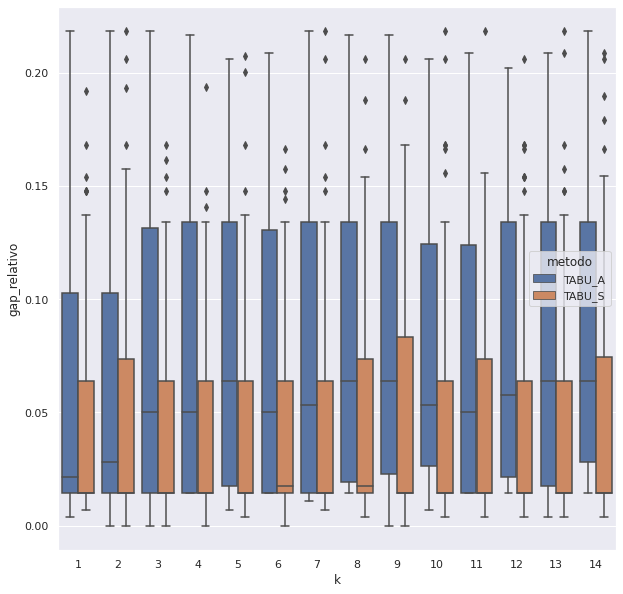

In [36]:
df_boxplot_tabu = df_resultados_tabu_parametros2[(df_resultados_tabu_parametros2['n'] == 14)].copy();
boxplot = sns.boxplot(x = df_boxplot_tabu['k'], y=df_boxplot_tabu['gap_relativo'], hue=df_boxplot_tabu['metodo'])
plt.savefig("graficos/mejores-parametros-tabu-k-n14-boxplot.svg")

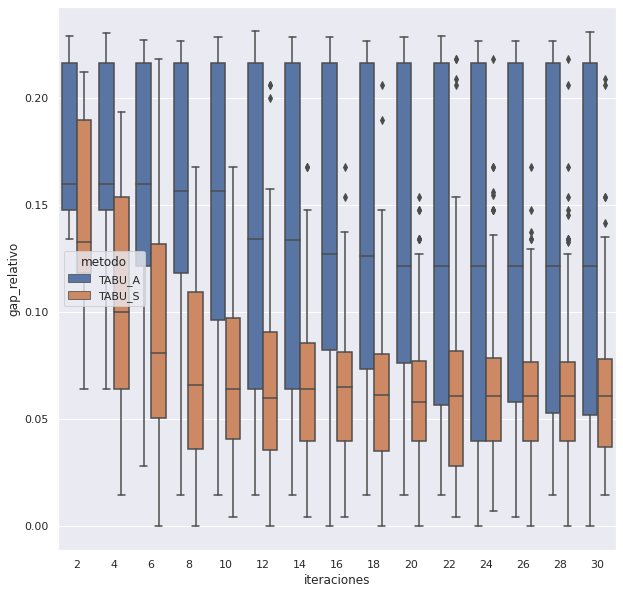

In [37]:
df_boxplot_tabu = df_resultados_tabu_parametros2.copy();
boxplot = sns.boxplot(x = df_boxplot_tabu['iteraciones'], y=df_boxplot_tabu['gap_relativo'], hue=df_boxplot_tabu['metodo'])
plt.savefig("graficos/mejores-parametros-tabu-iteraciones-boxplot.svg")

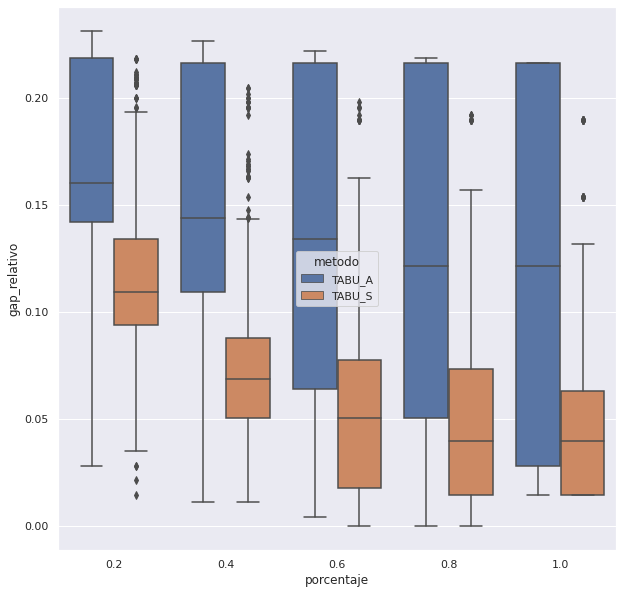

In [38]:
df_boxplot_tabu = df_resultados_tabu_parametros2.copy();
boxplot = sns.boxplot(x = df_boxplot_tabu['porcentaje'], y=df_boxplot_tabu['gap_relativo'], hue=df_boxplot_tabu['metodo'])
plt.savefig("graficos/mejores-parametros-tabu-%-boxplot.svg")

# Experimento 5
TABÚ_S con mejores parámetros vs heurísticas

In [39]:
df_resultados_exp5 = pd.read_csv("resultados/resultado_exp5.csv")
df_resultados_exp5_a280 = df_resultados_exp5[(df_resultados_exp5["n"]==280)].copy();
df_resultados_exp5_kroA200 = df_resultados_exp5[(df_resultados_exp5["n"]==200)].copy();
df_resultados_exp5_lin318 = df_resultados_exp5[(df_resultados_exp5["n"]==318)].copy();

df_resultados_exp5.head()

,dataset,n,m,metodo,obtenido,optimo,gap_relativo,tiempo,k,iteraciones,porcentaje
0,instancias-tsplib,280,39060,VEC,3157.0,2579,0.224118,0.911678,-,-,-
1,instancias-tsplib,280,39060,INS,3111.0,2579,0.206282,88.712800,-,-,-
2,instancias-tsplib,280,39060,AGM,3923.0,2579,0.521132,2.937500,-,-,-
3,instancias-tsplib,280,39060,TABU_A,2999.0,2579,0.162854,80052.700000,3,19,0.9
4,instancias-tsplib,280,39060,TABU_S,2820.0,2579,0.093447,5152.650000,3,19,0.9


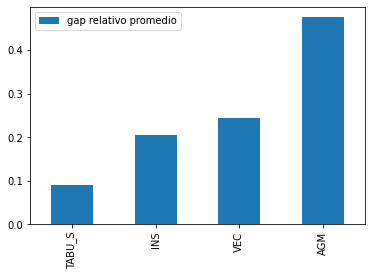

In [86]:
tabu_s_avg_gap = df_resultados_exp5[(df_resultados_exp5["metodo"]=="TABU_S")]["gap_relativo"].mean()
tabu_a_avg_gap = df_resultados_exp5[(df_resultados_exp5["metodo"]=="TABU_A")]["gap_relativo"].mean()
vec_avg_gap = df_resultados_exp5[(df_resultados_exp5["metodo"]=="VEC")]["gap_relativo"].mean()
ins_avg_gap = df_resultados_exp5[(df_resultados_exp5["metodo"]=="INS")]["gap_relativo"].mean()
agm_avg_gap = df_resultados_exp5[(df_resultados_exp5["metodo"]=="AGM")]["gap_relativo"].mean()

plotdata = pd.DataFrame(
    {"gap relativo promedio": [tabu_s_avg_gap, ins_avg_gap, vec_avg_gap, agm_avg_gap]}, 
    index=["TABU_S","INS", "VEC", "AGM"])

plotdata.plot(kind="bar")
plt.savefig("graficos/gap_relativo_bar.png")

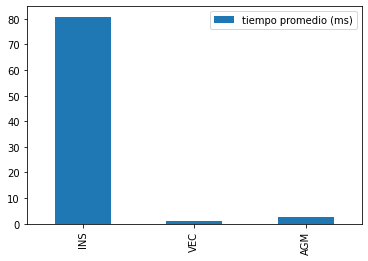

In [87]:
tabu_s_avg_gap = df_resultados_exp5[(df_resultados_exp5["metodo"]=="TABU_S")]["tiempo"].mean()
tabu_a_avg_gap = df_resultados_exp5[(df_resultados_exp5["metodo"]=="TABU_A")]["tiempo"].mean()
vec_avg_gap = df_resultados_exp5[(df_resultados_exp5["metodo"]=="VEC")]["tiempo"].mean()
ins_avg_gap = df_resultados_exp5[(df_resultados_exp5["metodo"]=="INS")]["tiempo"].mean()
agm_avg_gap = df_resultados_exp5[(df_resultados_exp5["metodo"]=="AGM")]["tiempo"].mean()

plotdata = pd.DataFrame(
    {"tiempo promedio (ms)": [ins_avg_gap, vec_avg_gap, agm_avg_gap]}, 
    index=["INS", "VEC", "AGM"])

plotdata.plot(kind="bar")
plt.savefig("graficos/tiempo_promedio_heu_bar.png")

<AxesSubplot:>

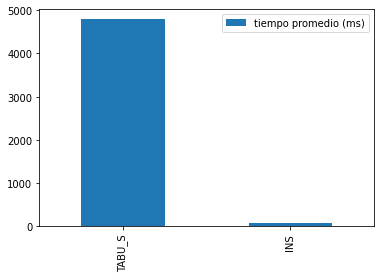

In [79]:
plotdata = pd.DataFrame(
    {"tiempo promedio (ms)": [tabu_s_avg_gap, ins_avg_gap]}, 
    index=["TABU_S", "INS"])

plotdata.plot(kind="bar")

In [26]:
df_resultados_exp5_a280.sort_values(by=['gap_relativo'])

,dataset,n,m,metodo,obtenido,optimo,gap_relativo,tiempo,k,iteraciones,porcentaje
4,instancias-tsplib,280,39060,TABU_S,2820.0,2579,0.093447,5152.650000,3,19,0.9
3,instancias-tsplib,280,39060,TABU_A,2999.0,2579,0.162854,80052.700000,3,19,0.9
1,instancias-tsplib,280,39060,INS,3111.0,2579,0.206282,88.712800,-,-,-
0,instancias-tsplib,280,39060,VEC,3157.0,2579,0.224118,0.911678,-,-,-
2,instancias-tsplib,280,39060,AGM,3923.0,2579,0.521132,2.937500,-,-,-


In [17]:
df_resultados_exp5_lin318.sort_values(by=['gap_relativo'])

,dataset,n,m,metodo,obtenido,optimo,gap_relativo,tiempo,k,iteraciones,porcentaje
14,instancias-tsplib,318,50403,TABU_S,47565.0,42029,0.131719,7372.86000,3,19,0.9
11,instancias-tsplib,318,50403,INS,50650.0,42029,0.205120,120.24800,-,-,-
13,instancias-tsplib,318,50403,TABU_A,50743.0,42029,0.207333,117107.00000,3,19,0.9
10,instancias-tsplib,318,50403,VEC,54019.0,42029,0.285279,1.13586,-,-,-
12,instancias-tsplib,318,50403,AGM,63157.0,42029,0.502701,3.71748,-,-,-
